In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.constraints import maxnorm
from keras.optimizers import SGD

from IPython.display import SVG,display
from keras.utils.vis_utils import model_to_dot

batch_size = 32
num_classes = 11
epochs = 20

Using TensorFlow backend.


In [8]:
def hot(y):
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(11))
    new_y = np.zeros((y.shape[0],y.shape[1]*num_classes))
    for i in range(len(y)):
        new_y[i,:] = label_binarizer.transform(y[i]).flatten()
    return new_y

In [3]:
def acccc(model):
    A = np.array(model.predict(x_test))
    c=0
    for i in range(A.shape[1]):
           c+=np.array_equal(np.argmax(np.array(A[:,i,:]),axis=1)[0:5],np.argmax(y_test[i].reshape((6,11)),axis=1)[0:5])
    print("Accuracy:",100*c/A.shape[1])
    return 100*c/A.shape[1]

# Loading normal data

In [5]:
# X = np.load("resizecrop.npy")
# Y = np.load("nummertrain.npy").astype(int)

In [11]:
X = np.load("aug/resize_cropImage.npy")
Y = np.load("aug/nummertrain.npy").astype(int)
A3 = np.load("aug/resize_aug2t3ima.npy")
N3 = np.load("aug/aug2t3nummer.npy").astype(int)
A4 = np.load("aug/resize_aug3t4ima.npy")
N4 = np.load("aug/aug3t4nummer.npy").astype(int)
A5 = np.load("aug/resize_aug4t5ima.npy")
N5 = np.load("aug/aug4t5nummer.npy").astype(int)
X = np.vstack((X,A3,A4,A5))
Y = np.vstack((Y,N3,N4,N5))

In [12]:
y = hot(Y)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [13]:
y1,y2,y3,y4,y5,ynum = y_train[:,0:11],y_train[:,11:22],y_train[:,22:33],y_train[:,33:44],y_train[:,44:55],y_train[:,55:66]
y1_t,y2_t,y3_t,y4_t,y5_t,ynum_t = y_test[:,0:11],y_test[:,11:22],y_test[:,22:33],y_test[:,33:44],y_test[:,44:55],y_test[:,55:66]
print('x_train shape:', x_train.shape)
print('y_train shape:', ynum.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (26721, 50, 50, 3)
y_train shape: (26721, 11)
26721 train samples


In [16]:
a = Input(shape=x_train.shape[1:])

x = Conv2D(32, (2, 2), padding='same')(a)
x = Activation('relu')(x)
x = Conv2D(32, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)


x = Conv2D(64, (4, 4), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (4, 4))(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)

conv_out = Flatten()(x)

num = Dense(128, activation='relu')(conv_out)
num = Dense(128, activation='relu')(num)
num = Dropout(0.5)(num)
numout = Dense(num_classes, activation='softmax',name="num")(num)

x1 = keras.layers.concatenate([conv_out, num])
x2 = keras.layers.concatenate([conv_out, num])
x3 = keras.layers.concatenate([conv_out, num])
x4 = keras.layers.concatenate([conv_out, num])
x5 = keras.layers.concatenate([conv_out, num])

x1 = Dense(128, activation='relu')(x1)
x2 = Dense(128, activation='relu')(x2)
x3 = Dense(128, activation='relu')(x3)
x4 = Dense(128, activation='relu')(x4)
x5 = Dense(128, activation='relu')(x5)


x1 = Dropout(0.5)(x1)
x2 = Dropout(0.5)(x2)
x3 = Dropout(0.5)(x3)
x4 = Dropout(0.5)(x4)
x5 = Dropout(0.5)(x5)


x1 = Dense(num_classes, activation='softmax', name='x1')(x1)
x2 = Dense(num_classes, activation='softmax', name='x2')(x2)
x3 = Dense(num_classes, activation='softmax', name='x3')(x3)
x4 = Dense(num_classes, activation='softmax', name='x4')(x4)
x5 = Dense(num_classes, activation='softmax', name='x5')(x5)

model = Model(inputs=a, outputs=[x1, x2, x3, x4, x5, numout])


# display(SVG(model_to_dot(model).create(prog='dot', format='svg')))
# load weights
# model.load_weights("weights.forksvhmbest.hdf5")

callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0)]
callbacks.append(keras.callbacks.TensorBoard(log_dir='./logs/fork', histogram_freq=0, write_graph=True, write_images=False))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [24]:
acc = acccc(model)
print("Initial accuracy: ",acc)

Accuracy: 71.30669061517737
Initial accuracy:  71.30669061517737


In [25]:
while(acc<=acccc(model)):
    model.save("forksvhmprime.h5")
    acc = acccc(model)
    model.fit(x_train, [y1,y2,y3,y4,y5,ynum],
        batch_size=batch_size,
        epochs=1,
        # validation_split=0.33,
        validation_data=(x_test,[y1_t,y2_t,y3_t,y4_t,y5_t,ynum_t]),
        shuffle=True,
        verbose=2)

Accuracy: 71.30669061517737
Accuracy: 71.30669061517737
Train on 26721 samples, validate on 6681 samples
Epoch 1/1
47s - loss: 1.2431 - x1_loss: 0.3559 - x2_loss: 0.4114 - x3_loss: 0.2906 - x4_loss: 0.0904 - x5_loss: 0.0048 - num_loss: 0.0901 - x1_acc: 0.8942 - x2_acc: 0.8764 - x3_acc: 0.9123 - x4_acc: 0.9727 - x5_acc: 0.9997 - num_acc: 0.9709 - val_loss: 1.4415 - val_x1_loss: 0.3742 - val_x2_loss: 0.4660 - val_x3_loss: 0.3184 - val_x4_loss: 0.1091 - val_x5_loss: 0.0048 - val_num_loss: 0.1690 - val_x1_acc: 0.8954 - val_x2_acc: 0.8771 - val_x3_acc: 0.9240 - val_x4_acc: 0.9778 - val_x5_acc: 0.9997 - val_num_acc: 0.9564
Accuracy: 76.41071695853914
Accuracy: 76.41071695853914
Train on 26721 samples, validate on 6681 samples
Epoch 1/1
46s - loss: 1.1928 - x1_loss: 0.3430 - x2_loss: 0.3935 - x3_loss: 0.2815 - x4_loss: 0.0849 - x5_loss: 0.0048 - num_loss: 0.0851 - x1_acc: 0.8985 - x2_acc: 0.8846 - x3_acc: 0.9155 - x4_acc: 0.9757 - x5_acc: 0.9997 - num_acc: 0.9729 - val_loss: 1.6167 - val_x1_l

In [9]:
A = np.array(model.predict(x_test))

In [23]:
c=0
for i in range(A.shape[1]):
       c+=np.array_equal(np.argmax(np.array(A[:,i,:]),axis=1)[0:5],np.argmax(y_test[i].reshape((6,11)),axis=1)[0:5])
print("Accuracy:",100*c/A.shape[1])

Accuracy: 69.5255201317168


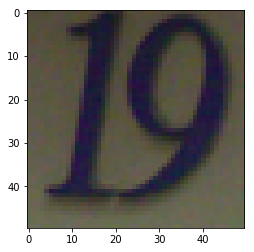

In [15]:
plt.imshow(X[0])
plt.show()